In [157]:
import pandas as pd
import numpy as np
import seaborn as sns

In [158]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/384464/london.csv')

In [159]:
df

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1      2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2      2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3      2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4      2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                    ...   ...  ...  ...    ...         ...           ...   
17409  2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410  2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411  2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412  2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413  2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [160]:
df.timestamp = pd.to_datetime(df.timestamp)

In [161]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

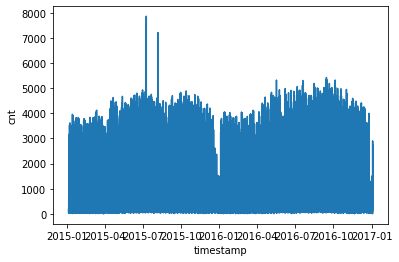

In [162]:
sns.lineplot(x='timestamp', y = 'cnt', data = df)

In [163]:
df = df.set_index('timestamp')

In [164]:
cnt = df.resample(rule='D').cnt.sum().to_frame().reset_index()

In [165]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.lineplot(x='timestamp', y = 'cnt', data = cnt)

In [166]:
cnt['rolling'] = cnt.cnt.rolling(3).mean()

In [167]:
mean = cnt.query('timestamp == "2015-07-09"')

In [168]:
mean

timestamp    cnt  rolling
186 2015-07-09  72504  50705.0

In [169]:
cnt

timestamp    cnt       rolling
0   2015-01-04   9234           NaN
1   2015-01-05  20372           NaN
2   2015-01-06  20613  16739.666667
3   2015-01-07  21064  20683.000000
4   2015-01-08  15601  19092.666667
..         ...    ...           ...
726 2016-12-30  11566  12682.000000
727 2016-12-31  11424  12347.333333
728 2017-01-01   6421   9803.666667
729 2017-01-02  11823   9889.333333
730 2017-01-03  19436  12560.000000

[731 rows x 3 columns]

In [170]:
cnt = cnt.astype({'cnt':'float'})

In [171]:
cnt['razn'] = cnt['cnt'] - cnt['rolling']

In [172]:
round(np.std(cnt.razn), 2)

4558.59

In [173]:
cnt['upper_bound'] = cnt['rolling'] + 2.576 * np.std(cnt.razn)

In [174]:
cnt['lower_bound'] = cnt['rolling'] - 2.576 * np.std(cnt.razn)

In [175]:
cnt

timestamp      cnt       rolling         razn   upper_bound  lower_bound
0   2015-01-04   9234.0           NaN          NaN           NaN          NaN
1   2015-01-05  20372.0           NaN          NaN           NaN          NaN
2   2015-01-06  20613.0  16739.666667  3873.333333  28482.585854  4996.747479
3   2015-01-07  21064.0  20683.000000   381.000000  32425.919188  8940.080812
4   2015-01-08  15601.0  19092.666667 -3491.666667  30835.585854  7349.747479
..         ...      ...           ...          ...           ...          ...
726 2016-12-30  11566.0  12682.000000 -1116.000000  24424.919188   939.080812
727 2016-12-31  11424.0  12347.333333  -923.333333  24090.252521   604.414146
728 2017-01-01   6421.0   9803.666667 -3382.666667  21546.585854 -1939.252521
729 2017-01-02  11823.0   9889.333333  1933.666667  21632.252521 -1853.585854
730 2017-01-03  19436.0  12560.000000  6876.000000  24302.919188   817.080812

[731 rows x 6 columns]

In [176]:
cnt.query('upper_bound < cnt')

timestamp      cnt       rolling          razn   upper_bound  \
186 2015-07-09  72504.0  50705.000000  21799.000000  62447.919188   
214 2015-08-06  63468.0  46627.333333  16840.666667  58370.252521   
609 2016-09-04  27512.0  14259.000000  13253.000000  26001.919188   
721 2016-12-25  36653.0  19650.666667  17002.333333  31393.585854   

      lower_bound  
186  38962.080812  
214  34884.414146  
609   2516.080812  
721   7907.747479

In [177]:
df

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
...                         ...         ...     ...  
2017-01-03 19:00:00         0.0         0.0     3.0  
2017-01-03 20:00:00         0.0         0.0     3.0  
2017-01-03 21:00:00         0.0         0.0     3.0  
2017-01-03 22:00:00         0.0         0.0     3.0  
2017-01-03 23:00:00         0.0         0.0     3.0  

[17414 rows x 9 columns]

In [178]:
df['2016-09-01' : '2016-09-03']

cnt    t1    t2   hum  wind_speed  weather_code  \
timestamp                                                               
2016-09-01 00:00:00   322  18.0  18.0  68.0        15.0           1.0   
2016-09-01 01:00:00   186  17.0  17.0  73.0        16.0           1.0   
2016-09-01 02:00:00    89  16.5  16.5  75.0        16.0           1.0   
2016-09-01 03:00:00    56  16.0  16.0  74.5        11.0           2.0   
2016-09-01 04:00:00    64  16.0  16.0  77.0        12.0           2.0   
2016-09-01 05:00:00   133  15.0  15.0  82.0        11.0           2.0   
2016-09-01 06:00:00   811  15.0  15.0  82.0        12.0           2.0   
2016-09-01 07:00:00  2663  16.0  16.0  77.0        11.0           2.0   
2016-09-01 08:00:00  4631  16.5  16.5  75.0         9.0           2.0   
2016-09-01 09:00:00  2365  18.0  18.0  68.0         6.5           2.0   
2016-09-01 10:00:00  1252  19.5  19.5  62.0        12.0           2.0   
2016-09-01 11:00:00  1205  21.0  21.0  57.0        15.0           1.0   
2016-09-01 12:00:00  1723  21.0  21.0  51.5        14.0           2.0   
2016-09-01 13:00:00  1784  22.5  22.0  45.5        12.0           2.0   
2016-09-01 14:00:00  1734  22.5  22.0  45.5        13.0           2.0   
2016-09-01 15:00:00  1897  23.5  23.5  44.0        14.0           1.0   
2016-09-01 16:00:00  2549  24.0  24.0  41.0        14.0           1.0   
2016-09-01 17:00:00  4573  23.5  23.0  41.0        16.0           1.0   
2016-09-01 18:00:00  4690  23.0  23.0  44.0        18.0           1.0   
2016-09-01 19:00:00  2776  22.5  22.5  50.0        17.0           1.0   
2016-09-01 20:00:00  1672  20.5  20.5  62.0        17.0           1.0   
2016-09-01 21:00:00  1156  19.0  19.0  68.0        17.0           1.0   
2016-09-01 22:00:00   939  18.5  18.5  68.0        18.0           1.0   
2016-09-03 12:00:00  2709  21.0  21.0  57.0        24.0           2.0   
2016-09-03 13:00:00  2382  20.0  20.0  64.0        24.0           4.0   
2016-09-03 14:00:00  2528  20.0  20.0  64.0        19.0           7.0   
2016-09-03 15:00:00  2663  21.0  21.0  60.0        26.0           2.0   
2016-09-03 16:00:00  1728  21.0  21.0  64.0        26.0           7.0   
2016-09-03 17:00:00   583  19.0  19.0  73.0        20.0           7.0   
2016-09-03 18:00:00   503  18.0  18.0  83.0        20.0           7.0   
2016-09-03 19:00:00   669  18.0  18.0  88.0        20.0           7.0   
2016-09-03 20:00:00   408  18.0  18.0  88.0        28.0           7.0   
2016-09-03 21:00:00   354  19.0  19.0  88.0        19.0           7.0   
2016-09-03 22:00:00   355  19.0  19.0  88.0        17.0           7.0   
2016-09-03 23:00:00   383  19.0  19.0  88.0        20.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2016-09-01 00:00:00         0.0         0.0     2.0  
2016-09-01 01:00:00         0.0         0.0     2.0  
2016-09-01 02:00:00         0.0         0.0     2.0  
2016-09-01 03:00:00         0.0         0.0     2.0  
2016-09-01 04:00:00         0.0         0.0     2.0  
2016-09-01 05:00:00         0.0         0.0     2.0  
2016-09-01 06:00:00         0.0         0.0     2.0  
2016-09-01 07:00:00         0.0         0.0     2.0  
2016-09-01 08:00:00         0.0         0.0     2.0  
2016-09-01 09:00:00         0.0         0.0     2.0  
2016-09-01 10:00:00         0.0         0.0     2.0  
2016-09-01 11:00:00         0.0         0.0     2.0  
2016-09-01 12:00:00         0.0         0.0     2.0  
2016-09-01 13:00:00         0.0         0.0     2.0  
2016-09-01 14:00:00         0.0         0.0     2.0  
2016-09-01 15:00:00         0.0         0.0     2.0  
2016-09-01 16:00:00         0.0         0.0     2.0  
2016-09-01 17:00:00         0.0         0.0     2.0  
2016-09-01 18:00:00         0.0         0.0     2.0  
2016-09-01 19:00:00         0.0         0.0     2.0  
2016-09-01 20:00:00         0.0         0.0     2.0  
2016-09-01 21:00:00         0.0         0.0     2.0  
2016-09-01 22:00:00     